# Environment and tools
 

# scikit-learn
# seaborn
# numpy
# pandas
# matplotlib

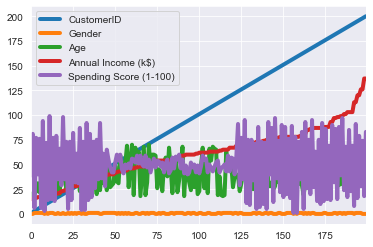

In [7]:
prefix = \
"""
 <!DOCTYPE html>
<html>
<head>
<style>
* {
    box-sizing: border-box;
}

.column {
    float: left;
    width: 33.33%;
    padding: 5px;
}

/* Clearfix (clear floats) */
.row::after {
    content: "";
    clear: both;
    display: table;
}
</style>
</head>
<body>

<h2>title</h2>

<div class="row">
  <div class="column">
"""

suffix = \
"""
  </div>
  <div class="column">
    <img src="pic_file.png" alt="Graph" style="width:100%">
  </div>
</div>
</body>
</html>
"""
import pandas as pd
import numpy as np
df = pd.read_csv("Mall_Customers.csv")
df.head()
df['Gender'] = df['Gender'].map({'Male': 0,'Female': 1})
ax = df.plot(lw=4)
title = "Customer Segmentation Data"
fig = ax.get_figure()
fig.savefig(title+".png")
html = prefix.replace('title', title)+df.to_html()+suffix.replace('pic_file.png', title+".png")

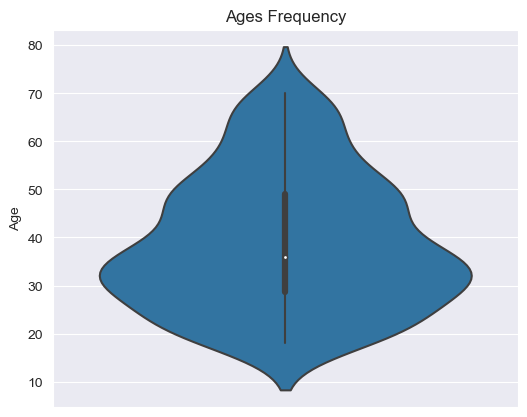

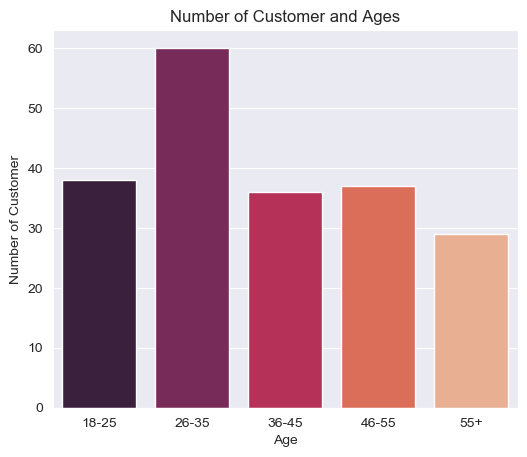

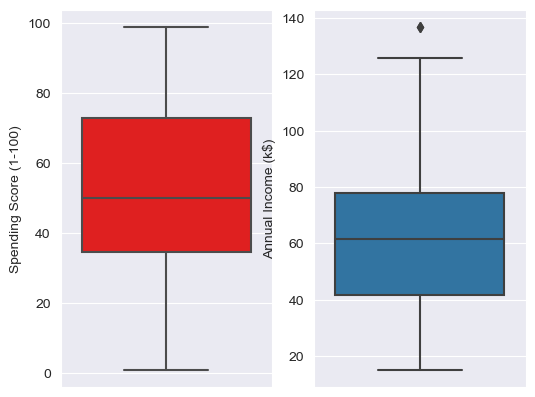

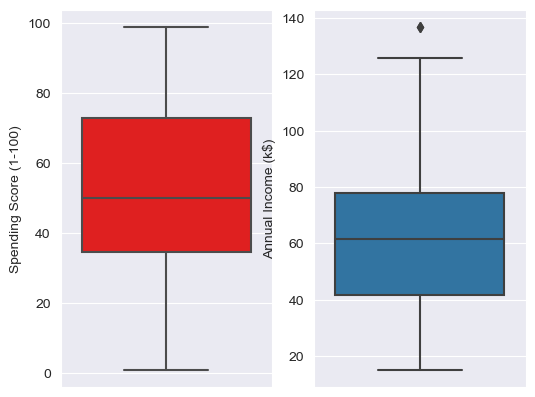

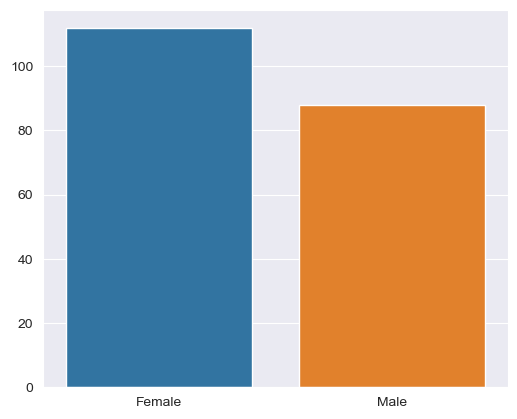

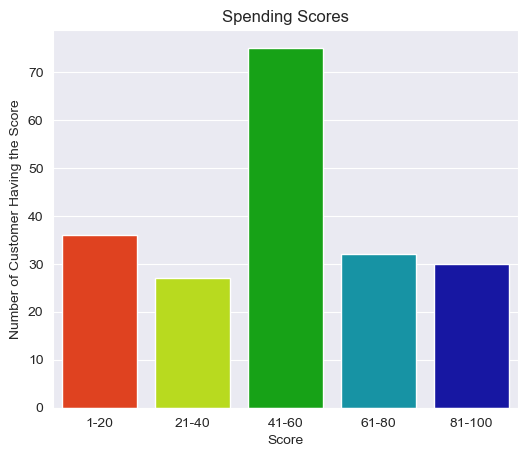

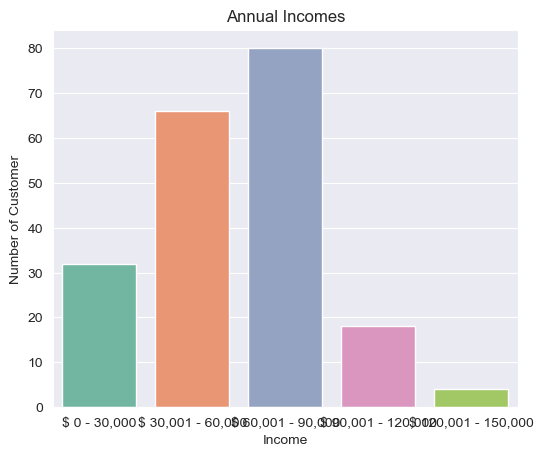

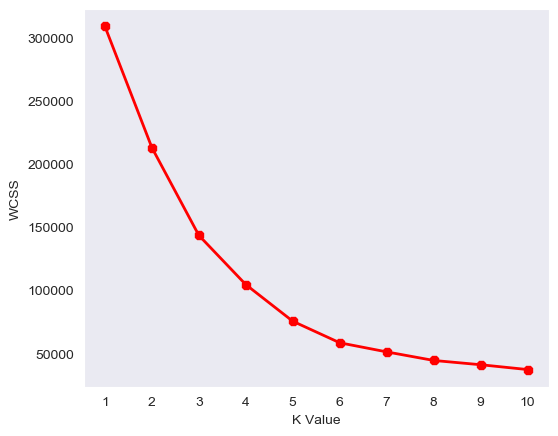

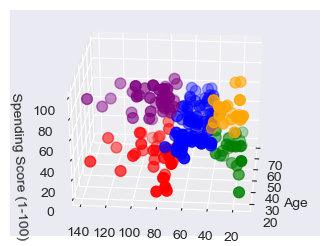

In [9]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from tkinter.ttk import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from PIL import ImageTk, Image
import os
import webbrowser
from tkinter import StringVar, IntVar


class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Customer Segmentation using K-Means")
        self.minsize(1000, 800)
        #self.wm_iconbitmap('icon.ico')
        self.df = pd.DataFrame([])
        Label(self, text = 'AMITY UNIVERSITY - FINAL PROJECT: CUSTOMER SEGMENTATION', font =('Verdana', 12),foreground = 'white', background = 'darkblue').grid(column = 0, row = 1, sticky='W', padx = 20, pady = 20)
        
            
        self.labelFrame = ttk.LabelFrame(self, text = "1. Open Dataset")
        self.labelFrame.grid(column = 0, row = 2, sticky='W', padx = 20, pady = 20)
        
        self.labelframe2 = LabelFrame(self, text = "2. Exploratory Data Analysis (EDA)")  
        self.labelframe2.grid(column = 0, row = 3, sticky='W', padx = 20)
        
        self.labelframe3 = LabelFrame(self, text = "3. K-Means ")  
        self.labelframe3.grid(column = 0, row = 4, sticky='W', padx = 20)
        
        self.labelTeam = LabelFrame(self, text = " - Team - ")  
        self.labelTeam.grid(column = 2, row = 1, sticky='W', padx = 10)
        
        self.labelSummary = LabelFrame(self, text = " - Graph Summary - ")  
        self.labelSummary.grid(column = 3, row = 1, sticky='W', padx = 20)
        
        self.button()
        
        lbl = Label(self.labelTeam, text=r"Gaurav Srivastava", foreground="blue", cursor="hand2")
        lbl.grid(column = 3, row = 1, sticky='W', padx = 20)
        lbl.bind("<Button-1>", lambda e: self.callback("https://www.linkedin.com/in/igsri/"))
        
        lbl1 = Label(self.labelTeam, text=r"Sumit Sharma", foreground="blue", cursor="hand2")
        lbl1.grid(column = 3, row = 2, sticky='W', padx = 20)
        lbl.bind("<Button-1>", lambda e: self.callback("https://www.linkedin.com/in/sumit-sharma-99564222/"))
        
        lbl2 = Label(self.labelTeam, text=r"Ujjwal Bhardwaj", foreground="blue", cursor="hand2")
        lbl2.grid(column = 3, row = 3, sticky='W', padx = 20)
        lbl2.bind("<Button-1>", lambda e: self.callback("https://www.linkedin.com/in/ujjval-bhardwaj-49b189a5/"))
        
        self.lblSummary = StringVar()
        
        self.lb = Label(self.labelSummary, textvariable=self.lblSummary, wraplength=500, font="helvetica 14")
        #self.lblSummary = Label(self.labelSummary, text=r"This is the Customer Segmentation", font =('Verdana', 12),foreground="black")
        self.lb.grid(column = 3, row = 3, sticky='W', padx = 20)
        
        
 

    def load_data(self,file_path):
        
        self.df = pd.read_csv(file_path)
        self.df.drop(["CustomerID"], axis = 1, inplace=True)
        df1=self.df.copy()
        df1.drop(["Age"], axis = 1, inplace=True)
        df1.drop(["Spending Score (1-100)"], axis = 1, inplace=True)
        figure1 = plt.Figure(figsize=(6,5), dpi=100)
        ax1 = figure1.add_subplot(111)
        bar1 = FigureCanvasTkAgg(figure1, root)
        bar1.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        df1 = df1.groupby('Gender').sum()
        df1.plot(kind='bar', legend=True, ax=ax1)
        ax1.set_title('Gender Wise Data')
        self.change("Data loaded")
        return self.df
    
    def button(self):
        style = Style() 
        style.configure('W.TButton', font = ('calibri', 11, 'bold'),foreground = 'blue', background = 'blue', focusthickness=3)
        
        self.button = ttk.Button(self.labelFrame,command = self.fileDialog, text=' Load Dataset ', style = 'W.TButton')
        self.button.grid(column = 1, row = 1)
        
        self.button = ttk.Button(self.labelframe2,command = self.age_frequency, text=' Plot Age Frequency ', style = 'W.TButton')
        self.button.grid(column = 1, row = 2)
        
        self.button = ttk.Button(self.labelframe2,command = self.number_of_customers_age_group, text=' Distribution of Customers in each Age Group ', style = 'W.TButton')
        self.button.grid(column = 2, row = 2, padx=5, pady=5)
        
        self.button = ttk.Button(self.labelframe2,command = self.spending_score_and_annual_income, text=' Spending Score & Annual Income ', style = 'W.TButton')
        self.button.grid(column = 1, row = 3, padx=5, pady=5)
        
        self.button = ttk.Button(self.labelframe2,command = self.distribution_male_female, text=' Distribution of Male & female ', style = 'W.TButton')
        self.button.grid(column = 2, row = 3, padx=5, pady=5)
        
        self.button = ttk.Button(self.labelframe2,command = self.Customers_according_to_their_Spending_Scores, text=' Customers according to their Spending Scores ', style = 'W.TButton')
        self.button.grid(column = 1, row = 4, padx=5, pady=5)
        
        self.button = ttk.Button(self.labelframe2,command = self.customers_according_to_their_annual_income, text=' Customers According To Their Annual Income ', style = 'W.TButton')
        self.button.grid(column = 2, row = 4, padx=5, pady=5)
        
        self.button = ttk.Button(self.labelframe3,command = self.find_optimal_number_of_cluster, text=' Find Optimal Number Of Cluster ', style = 'W.TButton')
        self.button.grid(column = 1, row = 1, padx=5, pady=5)
        
        self.button = ttk.Button(self.labelframe3,command = self.spending_score_of_the_customers_with_their_annual_income, text=' Spending Score Of The Customers With Their Annual Income ', style = 'W.TButton')
        self.button.grid(column = 2, row = 1, padx=5, pady=5)
        
        
    def callback(self, url):
        webbrowser.open_new(url)
        
    def fileDialog(self):
        filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetypes = (('csv files','*.csv'),) )
        label = ttk.Label(self.labelFrame, text = "")
        if filename != '':
            #self.label.grid(column = 1, row = 2)
            #self.label.configure(text =filename)
            self.df = self.load_data(filename)
            return self.df

    def age_frequency(self):
        figure1 = plt.figure(figsize=(6,5), dpi=100)
        plt.title("Ages Frequency")
        sns.axes_style("dark")
        sns.violinplot(y=self.df["Age"])
        canvas = FigureCanvasTkAgg(figure1, root)
        canvas.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        self.change("Age Frequency.")
        
    def spending_score_and_annual_income (self):        
        figure1 = plt.figure(figsize=(6,5), dpi=100)
        plt.subplot(1,2,1)
        sns.boxplot(y=self.df["Spending Score (1-100)"], color="red")
        plt.subplot(1,2,2)
        sns.boxplot(y=self.df["Annual Income (k$)"])
        canvas = FigureCanvasTkAgg(figure1, root)
        canvas.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        #canvas.draw()
        self.change("Box plot of spending score and annual income.")
    
    def distribution_male_female(self):
        genders = self.df.Gender.value_counts()
        sns.set_style("darkgrid")
        figure1 = plt.figure(figsize=(6,5), dpi=100)
        sns.barplot(x=genders.index, y=genders.values)
        canvas = FigureCanvasTkAgg(figure1, root)
        canvas.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        self.change("Distribution of gender (Male/Female).")
    
    def number_of_customers_age_group(self):
        age18_25 = self.df.Age[(self.df.Age <= 25) & (self.df.Age >= 18)]
        age26_35 = self.df.Age[(self.df.Age <= 35) & (self.df.Age >= 26)]
        age36_45 = self.df.Age[(self.df.Age <= 45) & (self.df.Age >= 36)]
        age46_55 = self.df.Age[(self.df.Age <= 55) & (self.df.Age >= 46)]
        age55above = self.df.Age[self.df.Age >= 56]

        x = ["18-25","26-35","36-45","46-55","55+"]
        y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

        figure1 = plt.figure(figsize=(6,5), dpi=100)
        sns.barplot(x=x, y=y, palette="rocket")
        plt.title("Number of Customer and Ages")
        plt.xlabel("Age")
        plt.ylabel("Number of Customer")
        canvas = FigureCanvasTkAgg(figure1, root)
        canvas.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        self.change("Number of Customer and Ages.")

    def Customers_according_to_their_Spending_Scores(self):
        ss1_20 = self.df["Spending Score (1-100)"][(self.df["Spending Score (1-100)"] >= 1) & (self.df["Spending Score (1-100)"] <= 20)]
        ss21_40 = self.df["Spending Score (1-100)"][(self.df["Spending Score (1-100)"] >= 21) & (self.df["Spending Score (1-100)"] <= 40)]
        ss41_60 = self.df["Spending Score (1-100)"][(self.df["Spending Score (1-100)"] >= 41) & (self.df["Spending Score (1-100)"] <= 60)]
        ss61_80 = self.df["Spending Score (1-100)"][(self.df["Spending Score (1-100)"] >= 61) & (self.df["Spending Score (1-100)"] <= 80)]
        ss81_100 = self.df["Spending Score (1-100)"][(self.df["Spending Score (1-100)"] >= 81) & (self.df["Spending Score (1-100)"] <= 100)]

        ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
        ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

        figure1 = plt.figure(figsize=(6,5), dpi=100)
        sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
        plt.title("Spending Scores")
        plt.xlabel("Score")
        plt.ylabel("Number of Customer Having the Score")
        canvas = FigureCanvasTkAgg(figure1, root)
        canvas.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        len_ss1_20 = len(ss1_20)
        len_ss21_40 = len(ss21_40)
        len_ss41_60 = len(ss41_60)
        len_ss61_80 = len(ss61_80)
        len_ss81_100 = len(ss81_100)
        
        #if 
        #self.label = ttk.Label(self.labelFrame2, text = "")
        #self.label.grid(column = 2, row = 1)
        #self.label.configure(text = "Tessdfsdfsdfdst")
        
        self.change("Bar plot to visualize the number of customers according to their spending scores. Majority of the customers have spending score in the range 41–60.")
                
    def customers_according_to_their_annual_income(self):
        ai0_30 = self.df["Annual Income (k$)"][(self.df["Annual Income (k$)"] >= 0) & (self.df["Annual Income (k$)"] <= 30)]
        ai31_60 = self.df["Annual Income (k$)"][(self.df["Annual Income (k$)"] >= 31) & (self.df["Annual Income (k$)"] <= 60)]
        ai61_90 = self.df["Annual Income (k$)"][(self.df["Annual Income (k$)"] >= 61) & (self.df["Annual Income (k$)"] <= 90)]
        ai91_120 = self.df["Annual Income (k$)"][(self.df["Annual Income (k$)"] >= 91) & (self.df["Annual Income (k$)"] <= 120)]
        ai121_150 = self.df["Annual Income (k$)"][(self.df["Annual Income (k$)"] >= 121) & (self.df["Annual Income (k$)"] <= 150)]

        aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
        aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

        figure1 = plt.figure(figsize=(6,5), dpi=100)
        sns.barplot(x=aix, y=aiy, palette="Set2")
        plt.title("Annual Incomes")
        plt.xlabel("Income")
        plt.ylabel("Number of Customer")
        canvas = FigureCanvasTkAgg(figure1, root)
        canvas.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        self.change("Bar plot to visualize the number of customers according to their annual income. Majority of the customers have annual income in the range 60000 and 90000.")
    
    def find_optimal_number_of_cluster(self):
        from sklearn.cluster import KMeans
        wcss = []
        for k in range(1,11):
            kmeans = KMeans(n_clusters=k, init="k-means++")
            kmeans.fit(self.df.iloc[:,1:])
            wcss.append(kmeans.inertia_)
        figure1 = plt.figure(figsize=(6,5), dpi=100)
        plt.grid()
        plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
        plt.xlabel("K Value")
        plt.xticks(np.arange(1,11,1))
        plt.ylabel("WCSS")
        canvas = FigureCanvasTkAgg(figure1, root)
        canvas.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        self.change("Plotted Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value.")
    
    def spending_score_of_the_customers_with_their_annual_income(self):
        from sklearn.cluster import KMeans
        from mpl_toolkits.mplot3d import Axes3D
        km = KMeans(n_clusters=5)
        clusters = km.fit_predict(self.df.iloc[:,1:])
        self.df["label"] = clusters

        figure1 = plt.figure(figsize=(4,3), dpi=100)
        ax = figure1.add_subplot(111, projection='3d')
        ax.scatter(self.df.Age[self.df.label == 0], self.df["Annual Income (k$)"][self.df.label == 0], self.df["Spending Score (1-100)"][self.df.label == 0], c='blue', s=60)
        ax.scatter(self.df.Age[self.df.label == 1], self.df["Annual Income (k$)"][self.df.label == 1], self.df["Spending Score (1-100)"][self.df.label == 1], c='red', s=60)
        ax.scatter(self.df.Age[self.df.label == 2], self.df["Annual Income (k$)"][self.df.label == 2], self.df["Spending Score (1-100)"][self.df.label == 2], c='green', s=60)
        ax.scatter(self.df.Age[self.df.label == 3], self.df["Annual Income (k$)"][self.df.label == 3], self.df["Spending Score (1-100)"][self.df.label == 3], c='orange', s=60)
        ax.scatter(self.df.Age[self.df.label == 4], self.df["Annual Income (k$)"][self.df.label == 4], self.df["Spending Score (1-100)"][self.df.label == 4], c='purple', s=60)
        ax.view_init(30, 185)
        plt.xlabel("Age")
        plt.ylabel("Annual Income (k$)")
        ax.set_zlabel('Spending Score (1-100)')
        canvas = FigureCanvasTkAgg(figure1, root)
        canvas.get_tk_widget().grid(column = 3, row=2, padx=80, pady=80, rowspan=5)
        
        self.change("3D plot to visualize the spending score of the customers with their annual income. The data points are separated into 5 classes which are represented in different colours as shown in the 3D plot. So, all the RED dotted are the customers who needs to be look for.")
        
    def change(self, text1):
        self.lblSummary.set(text1) 
    
    
root = Root()
root.mainloop()

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("Mall_Customers.csv")
df['Gender'] = df['Gender'].map({'Male': 0,'Female': 1})
df.head()


In [ ]:
!pip uninstall seaborn

In [1]:
import seaborn as sns

In [ ]:
!pip install --ignore-installed seaborn